In [1]:
from datetime import datetime
from keras import Input, Model
from keras.layers import LSTM, RepeatVector, Dense, Lambda, TimeDistributed
from scipy import io
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import keras
from sklearn.preprocessing import MinMaxScaler

config = tf.ConfigProto(device_count={'GPU': 1, 'CPU': 2})
sess = tf.Session(config=config)
keras.backend.set_session(sess)

Using TensorFlow backend.


In [2]:
def generate_simple_dataset(N, D, min_value, max_value):
    dataset = np.zeros((N, D))
    change_probability = 0.01
    for row in range(dataset.shape[0]):
        past_point = np.random.randint(min_value, max_value, 1)
        inclination = np.random.uniform(-10, 10, 1)
        for column in range(dataset.shape[1]):
            new_point = past_point + inclination
            if new_point > max_value:
                new_point = max_value
            elif new_point < min_value:
                new_point = min_value

            past_point = new_point
            dataset[row, column] = new_point
            if np.random.random() < change_probability:
                inclination = np.random.uniform(-10, 10, 1)
    return dataset

class ResultPlotter(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        plt.subplots(2, 2, figsize=(10, 3))
        indexes = np.random.randint(datapoints, size=4)
        for i in range(4):
            plt.subplot(2, 2, i+1)
            plt.plot(sparse_balances[indexes[i]])
            result = sequence_autoencoder.predict(sparse_balances[0:1])
            plt.plot(result.T)
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()
        return

result_plotter = ResultPlotter()

In [3]:
sparse_balances = io.mmread("/home/luca/PycharmProjects/Master-thesis/berka_dataset/parsed/sparse_balances.mtx")
# sparse_balances = io.mmread("/home/luca/PycharmProjects/Master-thesis/berka_dataset/parsed/sparse_transactions_min.mtx")
sparse_balances = sparse_balances.todense()
scaler = MinMaxScaler(feature_range=(0, 1))
sparse_balances = scaler.fit_transform(sparse_balances)
# sparse_balances = np.around(sparse_balances, decimals=1)
N = sparse_balances.shape[0]
D = sparse_balances.shape[1]

### LSTM -> Dense

In [4]:
batch_num = 32
timesteps = 500
latent_dim = 32
datapoints = N

model_inputs = Input(shape=(timesteps,))
inputs = Lambda(lambda x: keras.backend.expand_dims(x, -1))(model_inputs)
encoded = LSTM(latent_dim, return_sequences=False, activation='tanh')(inputs)
decoded = Dense(timesteps)(encoded)

sequence_autoencoder = Model(model_inputs, decoded)
encoder = Model(model_inputs, encoded)

earlyStopping=keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=0, mode='auto')

sequence_autoencoder.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/100
1280/1297 [============================>.] - ETA: 0s - loss: 0.0357

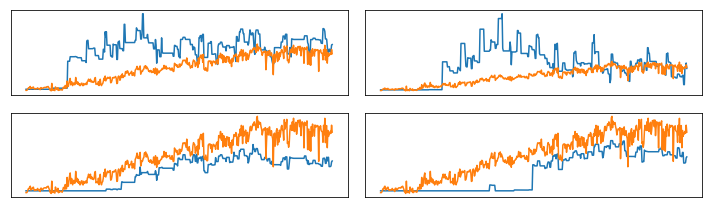

1297/1297 [==============================] - 38s 29ms/step - loss: 0.0355
Epoch 2/100
1280/1297 [============================>.] - ETA: 0s - loss: 0.0183

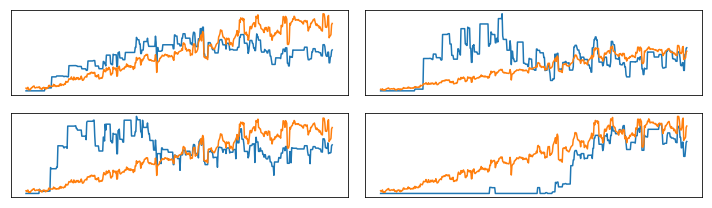

1297/1297 [==============================] - 39s 30ms/step - loss: 0.0182
Epoch 3/100
 192/1297 [===>..........................] - ETA: 33s - loss: 0.0168

KeyboardInterrupt: 

In [5]:
sequence_autoencoder.fit(sparse_balances[:datapoints], sparse_balances[:datapoints],
                         batch_size=batch_num, epochs=100,
                        callbacks=[earlyStopping, result_plotter])

### Dense -> Dense

In [9]:
batch_num = 32
timesteps = 500
latent_dim = 32
datapoints = N

inputs = Input(shape=(timesteps,))
encoded = Dense(256)(inputs)
encoded = Dense(latent_dim, activation='tanh')(encoded)
decoded = Dense(256)(encoded)
decoded = Dense(timesteps)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

earlyStopping=keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=0, mode='auto')
result_plotter = ResultPlotter()

sequence_autoencoder.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/100
1216/1297 [===========================>..] - ETA: 0s - loss: 0.0153

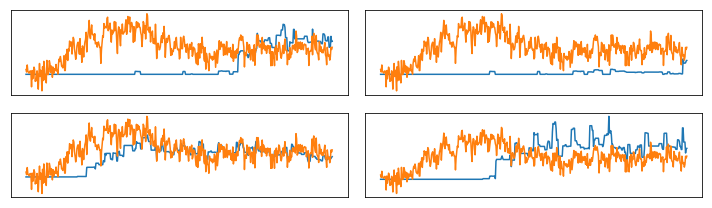

1297/1297 [==============================] - 1s 845us/step - loss: 0.0146
Epoch 2/100
1248/1297 [===========================>..] - ETA: 0s - loss: 0.0038

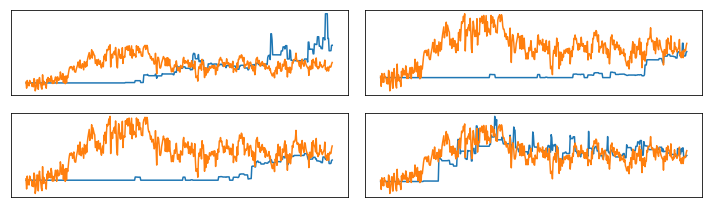

1297/1297 [==============================] - 1s 656us/step - loss: 0.0038
Epoch 3/100
1248/1297 [===========================>..] - ETA: 0s - loss: 0.0026

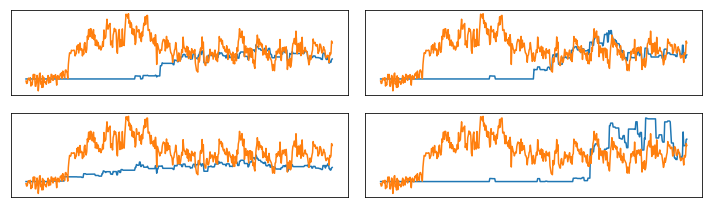

1297/1297 [==============================] - 1s 700us/step - loss: 0.0026
Epoch 4/100
1152/1297 [=========================>....] - ETA: 0s - loss: 0.0020

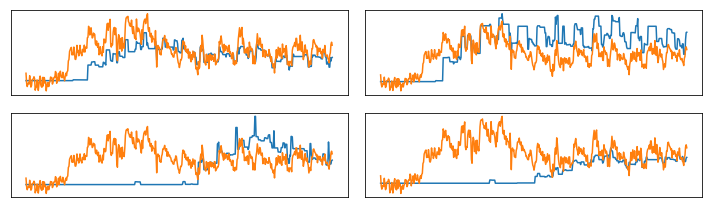

1297/1297 [==============================] - 1s 666us/step - loss: 0.0020
Epoch 5/100
1120/1297 [========================>.....] - ETA: 0s - loss: 0.0017

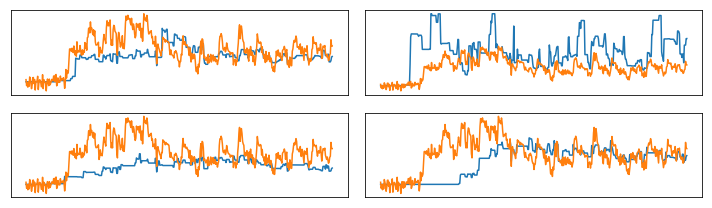

1297/1297 [==============================] - 1s 837us/step - loss: 0.0017
Epoch 6/100
1248/1297 [===========================>..] - ETA: 0s - loss: 0.0014

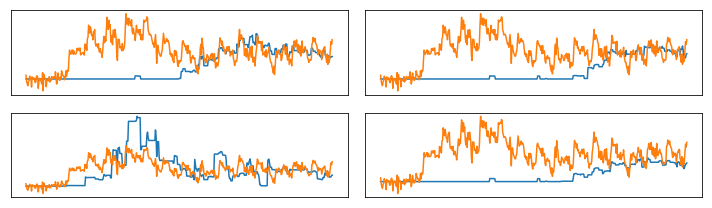

1297/1297 [==============================] - 1s 755us/step - loss: 0.0014
Epoch 7/100
1280/1297 [============================>.] - ETA: 0s - loss: 0.0012

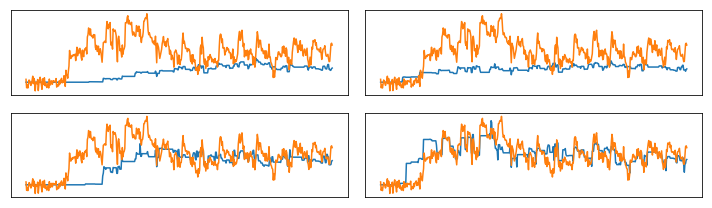

1297/1297 [==============================] - 1s 742us/step - loss: 0.0012
Epoch 8/100
1248/1297 [===========================>..] - ETA: 0s - loss: 0.0011

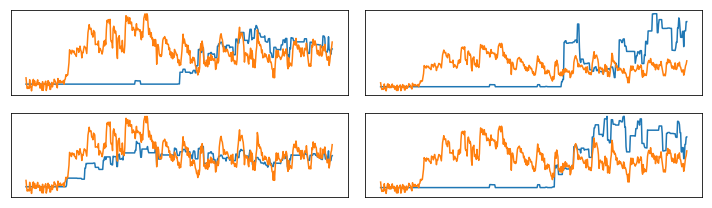

1297/1297 [==============================] - 1s 705us/step - loss: 0.0011
Epoch 9/100
1248/1297 [===========================>..] - ETA: 0s - loss: 9.5756e-04

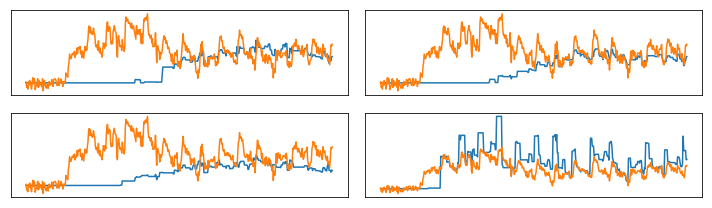

1297/1297 [==============================] - 1s 702us/step - loss: 9.6672e-04
Epoch 10/100
1120/1297 [========================>.....] - ETA: 0s - loss: 8.7482e-04

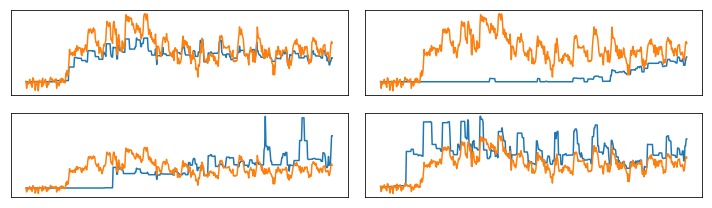

1297/1297 [==============================] - 1s 761us/step - loss: 8.8405e-04
Epoch 11/100
1184/1297 [==========================>...] - ETA: 0s - loss: 8.2174e-04

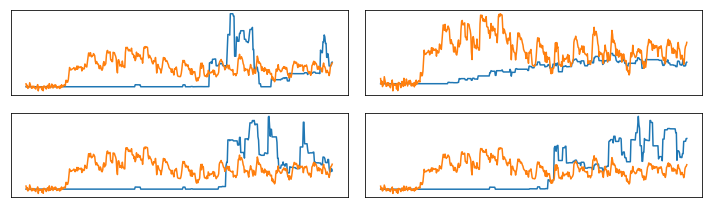

1297/1297 [==============================] - 1s 764us/step - loss: 8.0874e-04
Epoch 12/100
1184/1297 [==========================>...] - ETA: 0s - loss: 7.4691e-04

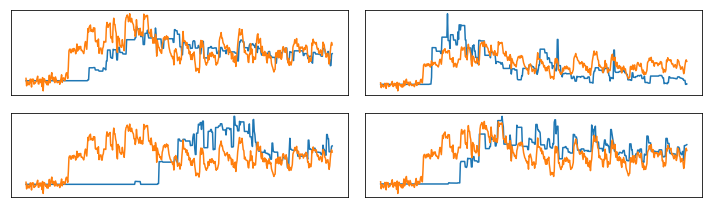

1297/1297 [==============================] - 1s 771us/step - loss: 7.3651e-04
Epoch 13/100
1184/1297 [==========================>...] - ETA: 0s - loss: 7.3036e-04

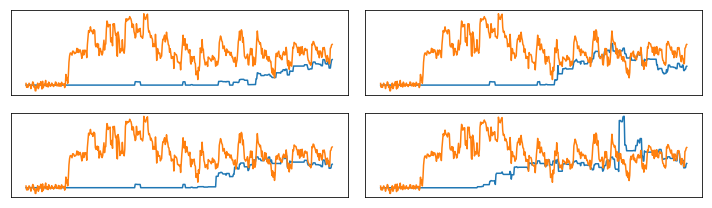

1297/1297 [==============================] - 1s 684us/step - loss: 7.1750e-04
Epoch 14/100
1216/1297 [===========================>..] - ETA: 0s - loss: 6.6352e-04

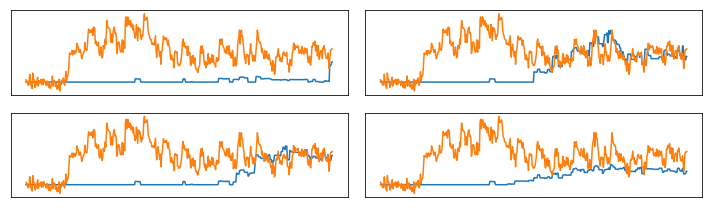

1297/1297 [==============================] - 1s 682us/step - loss: 6.6280e-04
Epoch 15/100
1248/1297 [===========================>..] - ETA: 0s - loss: 6.3886e-04

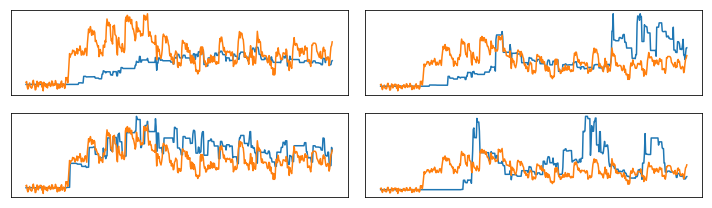

1297/1297 [==============================] - 1s 643us/step - loss: 6.4310e-04
Epoch 16/100
1184/1297 [==========================>...] - ETA: 0s - loss: 5.6885e-04

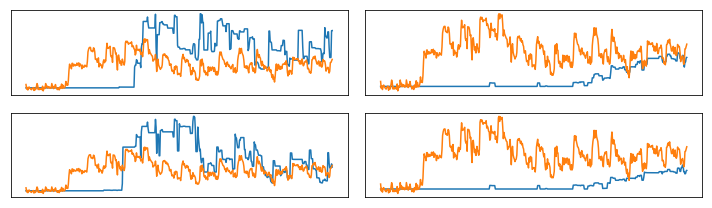

1297/1297 [==============================] - 1s 721us/step - loss: 5.7010e-04
Epoch 17/100
1216/1297 [===========================>..] - ETA: 0s - loss: 5.7064e-04

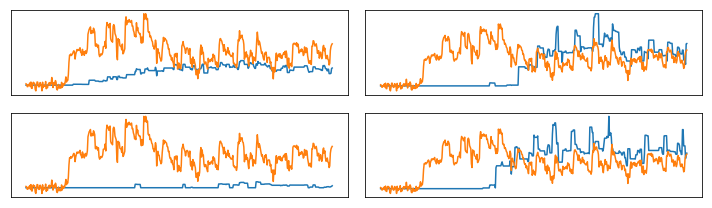

1297/1297 [==============================] - 1s 751us/step - loss: 5.7542e-04
Epoch 18/100
1248/1297 [===========================>..] - ETA: 0s - loss: 6.0910e-04

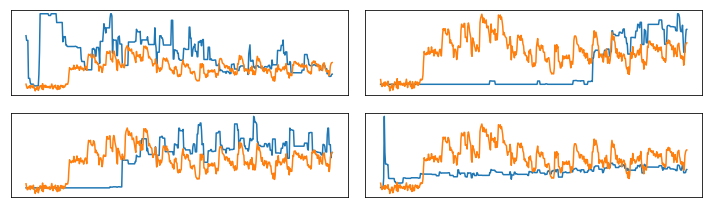

1297/1297 [==============================] - 1s 622us/step - loss: 6.0200e-04
Epoch 19/100
1280/1297 [============================>.] - ETA: 0s - loss: 5.3616e-04

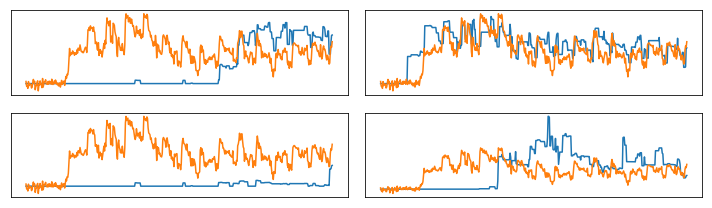

1297/1297 [==============================] - 1s 665us/step - loss: 5.3725e-04
Epoch 20/100
1216/1297 [===========================>..] - ETA: 0s - loss: 6.4392e-04

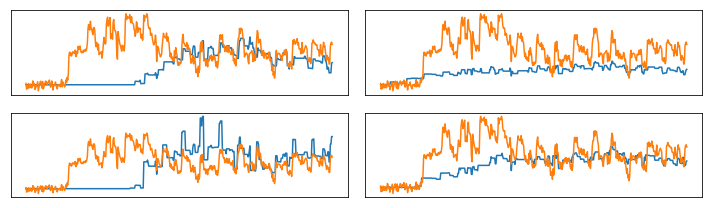

1297/1297 [==============================] - 1s 655us/step - loss: 6.3789e-04
Epoch 21/100
1216/1297 [===========================>..] - ETA: 0s - loss: 4.9208e-04

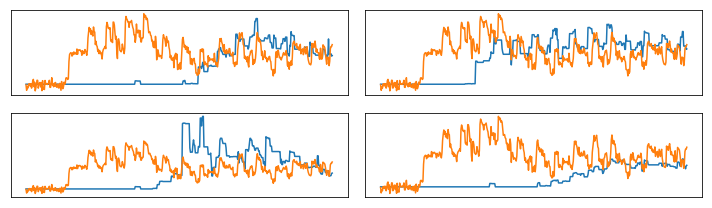

1297/1297 [==============================] - 1s 642us/step - loss: 4.8758e-04
Epoch 22/100
1248/1297 [===========================>..] - ETA: 0s - loss: 4.3829e-04

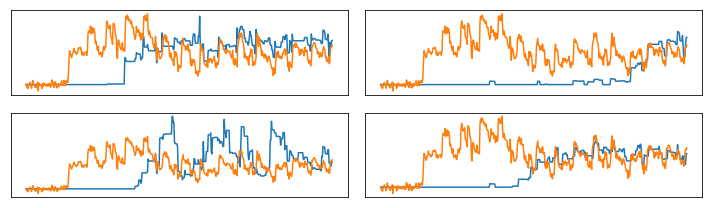

1297/1297 [==============================] - 1s 653us/step - loss: 4.3423e-04
Epoch 23/100
1184/1297 [==========================>...] - ETA: 0s - loss: 4.0949e-04

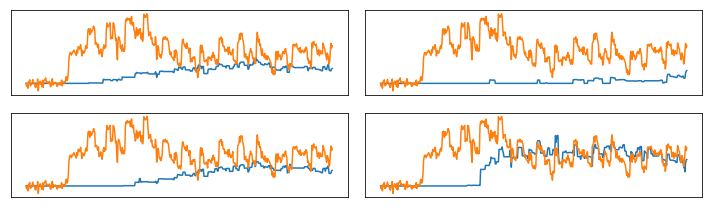

1297/1297 [==============================] - 1s 755us/step - loss: 4.1065e-04
Epoch 24/100
1280/1297 [============================>.] - ETA: 0s - loss: 4.0265e-04

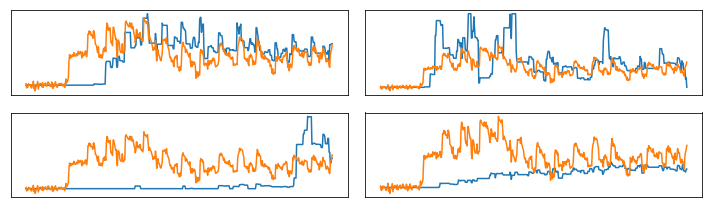

1297/1297 [==============================] - 1s 596us/step - loss: 4.0328e-04
Epoch 25/100
1280/1297 [============================>.] - ETA: 0s - loss: 3.8618e-04

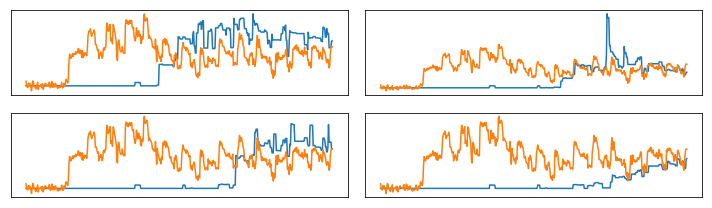

1297/1297 [==============================] - 1s 727us/step - loss: 3.8636e-04
Epoch 26/100
1216/1297 [===========================>..] - ETA: 0s - loss: 3.7547e-04

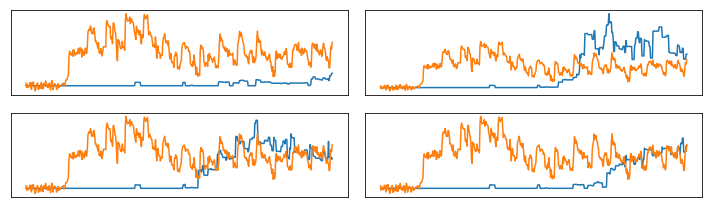

1297/1297 [==============================] - 1s 608us/step - loss: 3.7485e-04
Epoch 27/100
1120/1297 [========================>.....] - ETA: 0s - loss: 3.6641e-04

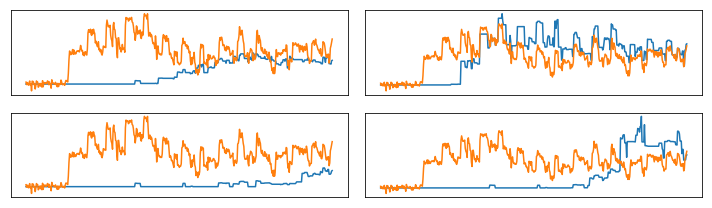

1297/1297 [==============================] - 1s 684us/step - loss: 3.6348e-04
Epoch 28/100
1184/1297 [==========================>...] - ETA: 0s - loss: 3.7539e-04

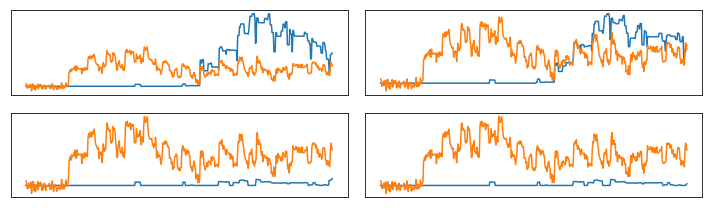

1297/1297 [==============================] - 1s 750us/step - loss: 3.8358e-04
Epoch 29/100
1280/1297 [============================>.] - ETA: 0s - loss: 3.7292e-04

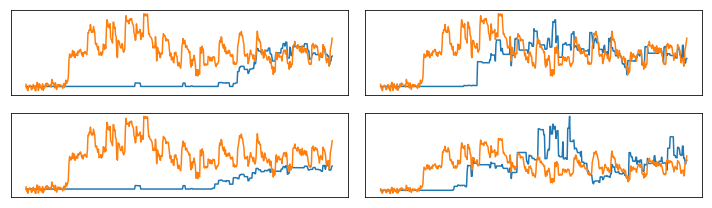

1297/1297 [==============================] - 1s 638us/step - loss: 3.7539e-04
Epoch 30/100
1152/1297 [=========================>....] - ETA: 0s - loss: 3.4528e-04

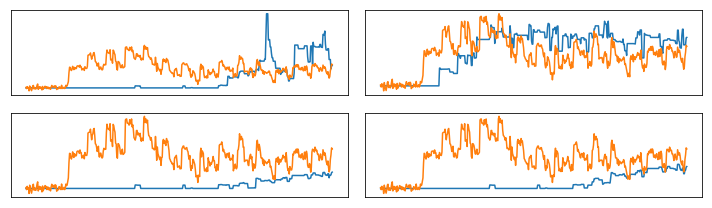

1297/1297 [==============================] - 1s 628us/step - loss: 3.4945e-04
Epoch 31/100
1120/1297 [========================>.....] - ETA: 0s - loss: 3.5972e-04

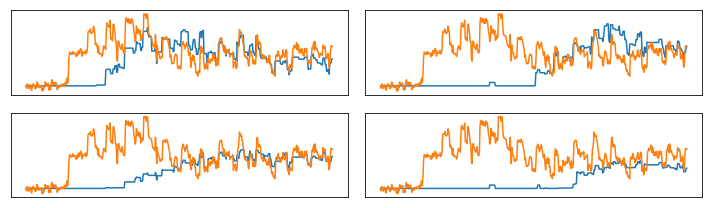

1297/1297 [==============================] - 1s 674us/step - loss: 3.5427e-04
Epoch 32/100
1216/1297 [===========================>..] - ETA: 0s - loss: 3.5763e-04

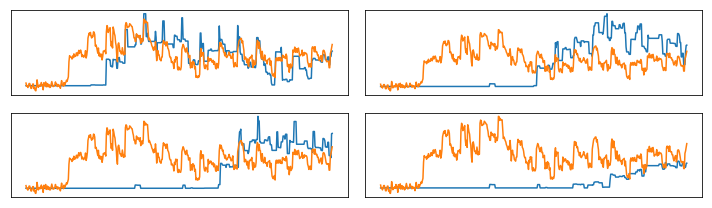

1297/1297 [==============================] - 1s 647us/step - loss: 3.5785e-04
Epoch 33/100
1152/1297 [=========================>....] - ETA: 0s - loss: 3.3514e-04

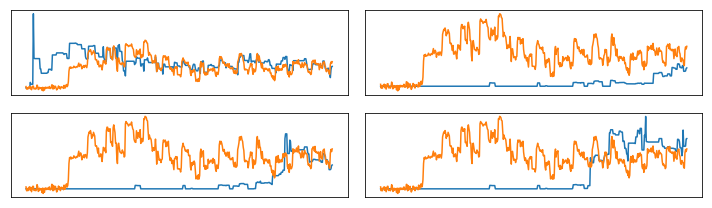

1297/1297 [==============================] - 1s 615us/step - loss: 3.4162e-04
Epoch 34/100
1248/1297 [===========================>..] - ETA: 0s - loss: 3.3027e-04

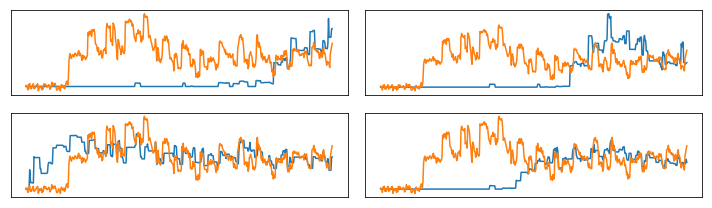

1297/1297 [==============================] - 1s 730us/step - loss: 3.3253e-04
Epoch 35/100
1248/1297 [===========================>..] - ETA: 0s - loss: 3.2921e-04

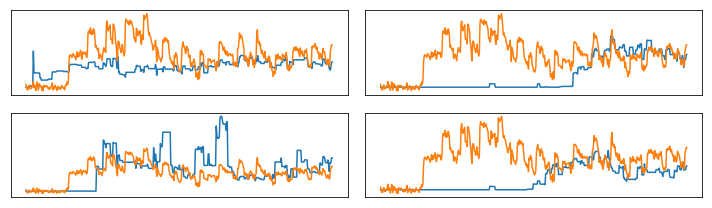

1297/1297 [==============================] - 1s 679us/step - loss: 3.3292e-04
Epoch 36/100
1216/1297 [===========================>..] - ETA: 0s - loss: 3.2747e-04

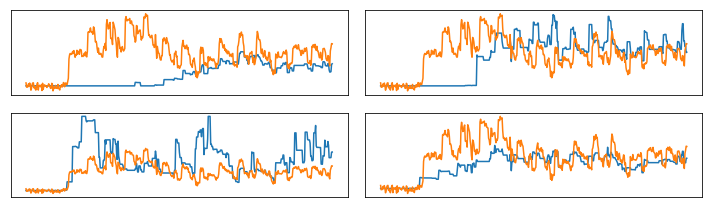

1297/1297 [==============================] - 1s 628us/step - loss: 3.2163e-04
Epoch 37/100
1280/1297 [============================>.] - ETA: 0s - loss: 3.3135e-04

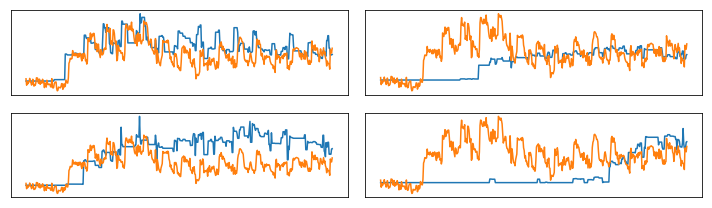

1297/1297 [==============================] - 1s 638us/step - loss: 3.3119e-04
Epoch 38/100
1248/1297 [===========================>..] - ETA: 0s - loss: 4.7516e-04

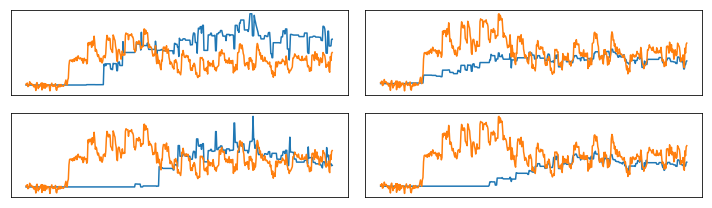

1297/1297 [==============================] - 1s 724us/step - loss: 4.7408e-04
Epoch 39/100
1280/1297 [============================>.] - ETA: 0s - loss: 3.7423e-04

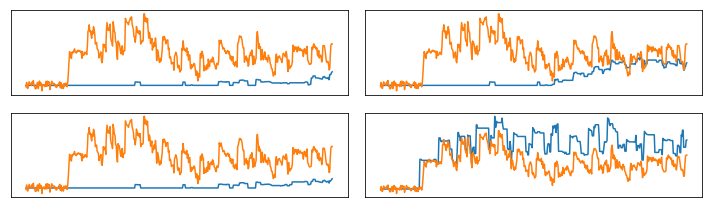

1297/1297 [==============================] - 1s 1ms/step - loss: 3.7374e-04
Epoch 40/100
1248/1297 [===========================>..] - ETA: 0s - loss: 3.3310e-04

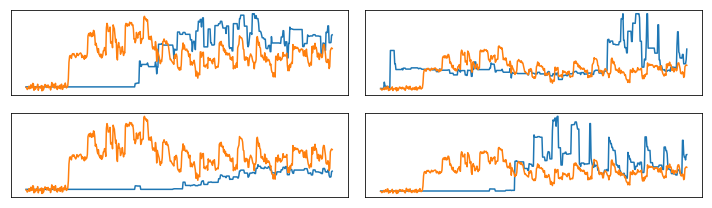

1297/1297 [==============================] - 1s 652us/step - loss: 3.3115e-04
Epoch 41/100
1280/1297 [============================>.] - ETA: 0s - loss: 3.1080e-04

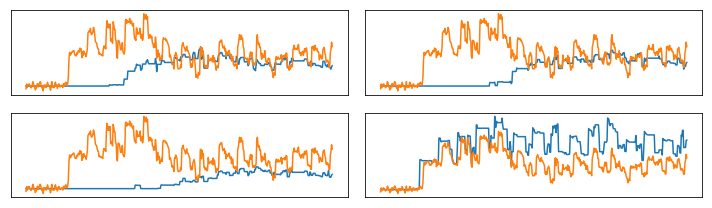

1297/1297 [==============================] - 1s 644us/step - loss: 3.1043e-04
Epoch 42/100
1280/1297 [============================>.] - ETA: 0s - loss: 3.1386e-04

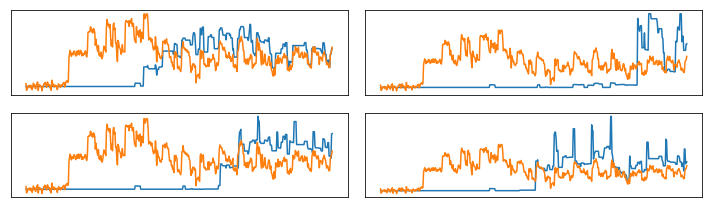

1297/1297 [==============================] - 1s 623us/step - loss: 3.1269e-04
Epoch 43/100
1184/1297 [==========================>...] - ETA: 0s - loss: 3.2498e-04

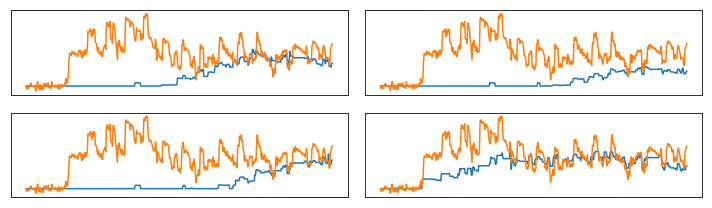

1297/1297 [==============================] - 1s 640us/step - loss: 3.2439e-04
Epoch 44/100
1280/1297 [============================>.] - ETA: 0s - loss: 2.8935e-04

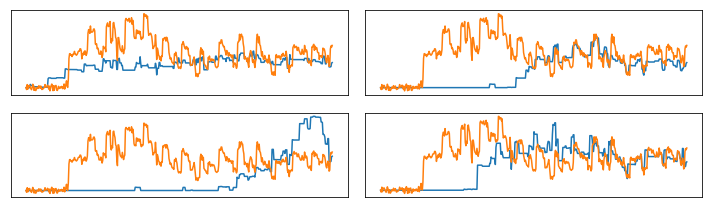

1297/1297 [==============================] - 1s 634us/step - loss: 2.9010e-04
Epoch 45/100
1248/1297 [===========================>..] - ETA: 0s - loss: 2.7302e-04

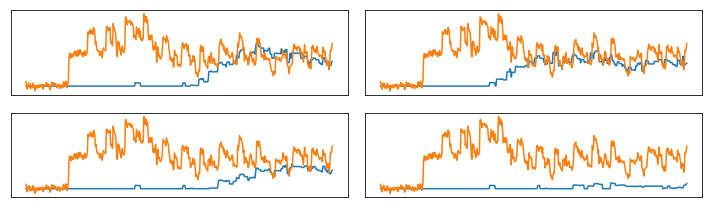

1297/1297 [==============================] - 1s 851us/step - loss: 2.7038e-04
Epoch 46/100
1280/1297 [============================>.] - ETA: 0s - loss: 2.3464e-04

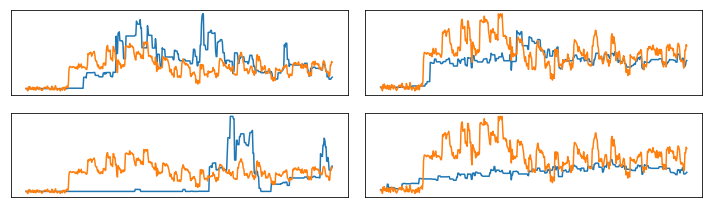

1297/1297 [==============================] - 1s 600us/step - loss: 2.3485e-04
Epoch 47/100
1248/1297 [===========================>..] - ETA: 0s - loss: 2.3945e-04

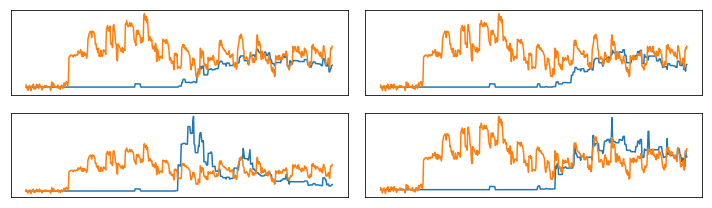

1297/1297 [==============================] - 1s 648us/step - loss: 2.4198e-04
Epoch 48/100
1248/1297 [===========================>..] - ETA: 0s - loss: 2.6919e-04

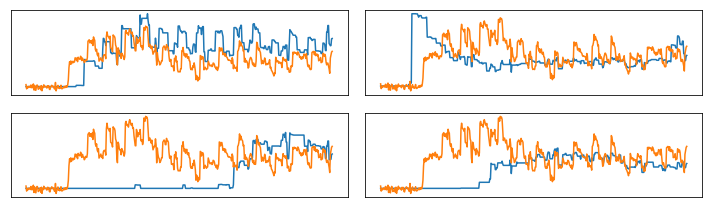

1297/1297 [==============================] - 1s 666us/step - loss: 2.6945e-04
Epoch 49/100
1120/1297 [========================>.....] - ETA: 0s - loss: 2.5902e-04

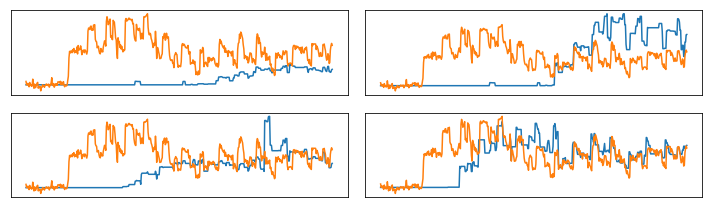

1297/1297 [==============================] - 1s 658us/step - loss: 2.6123e-04
Epoch 50/100
1216/1297 [===========================>..] - ETA: 0s - loss: 2.5685e-04

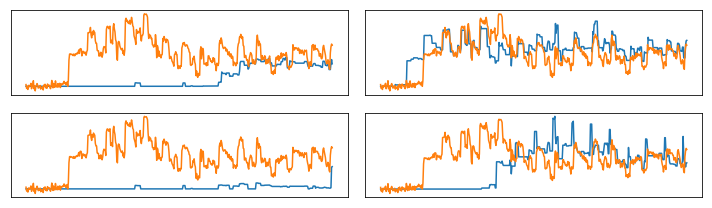

1297/1297 [==============================] - 1s 651us/step - loss: 2.5799e-04
Epoch 51/100
1216/1297 [===========================>..] - ETA: 0s - loss: 2.3970e-04

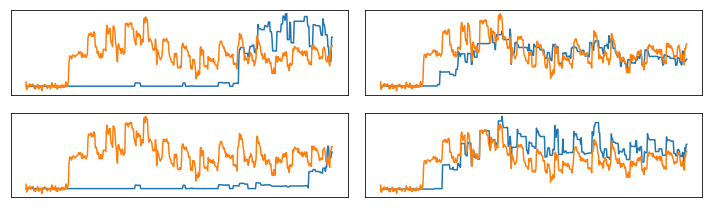

1297/1297 [==============================] - 1s 829us/step - loss: 2.4176e-04


In [10]:
sequence_autoencoder.fit(sparse_balances[:datapoints], sparse_balances[:datapoints],
                         batch_size=batch_num, epochs=100,
                        callbacks=[earlyStopping, result_plotter])

### Dense -> LSTM

In [11]:
batch_num = 32
timesteps = 500
latent_dim = 32
datapoints = N

inputs = Input(shape=(timesteps,))
encoded = Dense(latent_dim, activation='tanh')(inputs)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(128, return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(1))(decoded)
decoded = Lambda(lambda x: keras.backend.squeeze(x, -1))(decoded)
sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

earlyStopping=keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=0, mode='auto')

sequence_autoencoder.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/100
1280/1297 [============================>.] - ETA: 0s - loss: 0.0236

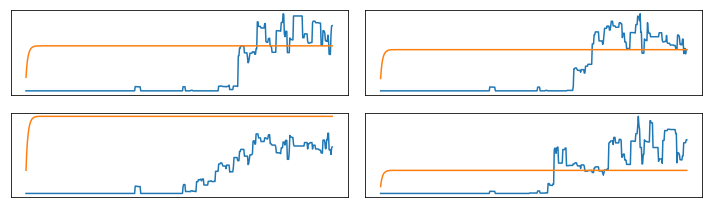

1297/1297 [==============================] - 43s 33ms/step - loss: 0.0235
Epoch 2/100
  96/1297 [=>............................] - ETA: 45s - loss: 0.0188

KeyboardInterrupt: 

In [12]:
sequence_autoencoder.fit(sparse_balances[:datapoints], sparse_balances[:datapoints],
                         batch_size=batch_num, epochs=100,
                        callbacks=[earlyStopping, result_plotter])

### LSTM -> LSTM

In [38]:
batch_num = 32
timesteps = 500
latent_dim = 32
datapoints = 100

model_inputs = Input(shape=(timesteps,))
inputs = Lambda(lambda x: keras.backend.expand_dims(x, -1))(model_inputs)
encoded = LSTM(128)(inputs)
encoded = Dense(latent_dim, activation='tanh')(encoded)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(128, return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(1))(decoded)
decoded = Lambda(lambda x: keras.backend.squeeze(x, -1))(decoded)
sequence_autoencoder = Model(model_inputs, decoded)
encoder = Model(model_inputs, encoded)

earlyStopping=keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=0, mode='auto')

sequence_autoencoder.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0345

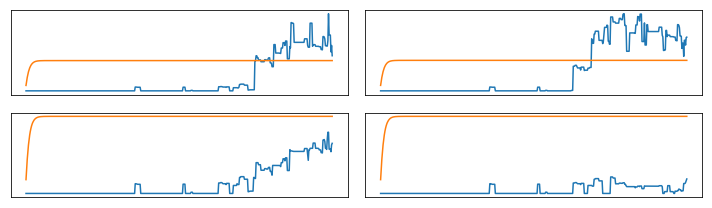

100/100 [==============================] - 12s 118ms/step - loss: 0.0343
Epoch 2/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0283

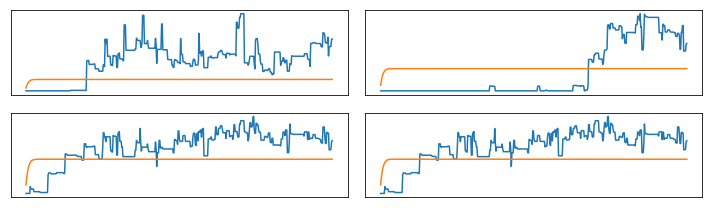

100/100 [==============================] - 9s 91ms/step - loss: 0.0278
Epoch 3/100
 32/100 [========>.....................] - ETA: 4s - loss: 0.0270

KeyboardInterrupt: 

In [39]:
sequence_autoencoder.fit(sparse_balances[:datapoints], sparse_balances[:datapoints],
                         batch_size=batch_num, epochs=100,
                        callbacks=[earlyStopping, result_plotter])